# Data Loading

In [ ]:
! pip install arabic_reshaper

In [ ]:
! pip install python-bidi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import zipfile
import os

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set maximum column width
pd.set_option('display.max_colwidth', None)

In [ ]:
df =  pd.read_csv("Arabic_resturant_reviews.csv", encoding='utf-8-sig')

# EDA

In [ ]:
df.head()

,review,label
0,المطعم يجنن والاكل تحفة,1
1,أنصح بزيارة المطعم ده بجد، الأكل عندهم لذيذ والخدمة متميزة جداً.,1
2,لقد كانت تجربة سيئة، الطعام غير مقبول والخدمة سيئة للغاية.,0
3,الطاقم غير احترافي على الإطلاق، والخدمة بطيئة وغير فعّالة.,0
4,الطعام في هذا المطعم كان سيئًا للغاية والخدمة كانت سيئة أيضًا، لم يكن هناك أي اهتمام بتجربة العملاء.,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  800 non-null    object
 1   label   800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(800, 2)

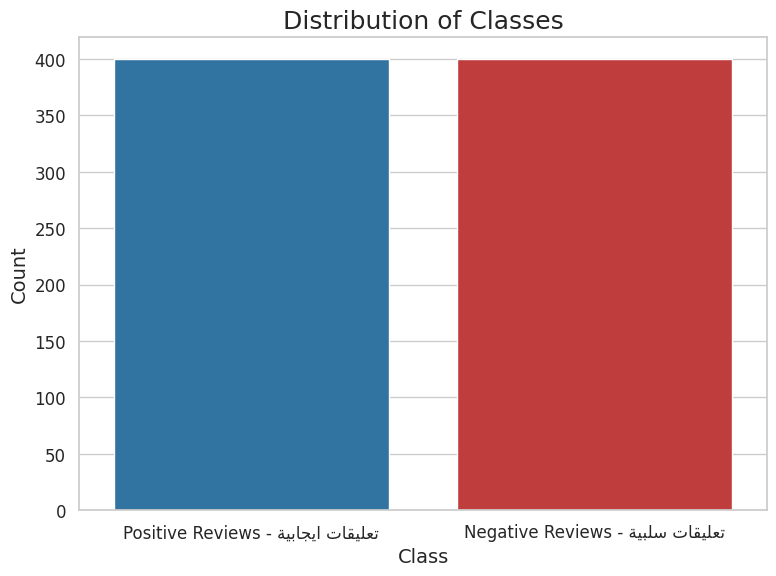

In [ ]:
positive = get_display(arabic_reshaper.reshape('Positive Reviews - تعليقات ايجابية'))
negative = get_display(arabic_reshaper.reshape('Negative Reviews - تعليقات سلبية'))

# Your class distribution data
class_distribution = df['label'].value_counts()

# Define mapping from numerical labels to Arabic strings
label_mapping = {1: positive, 0: negative}

# Map numerical labels to Arabic strings
class_distribution.index = class_distribution.index.map(label_mapping)

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["#1f77b4", "#d62728"])
plt.title('Distribution of Classes', fontsize=18)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

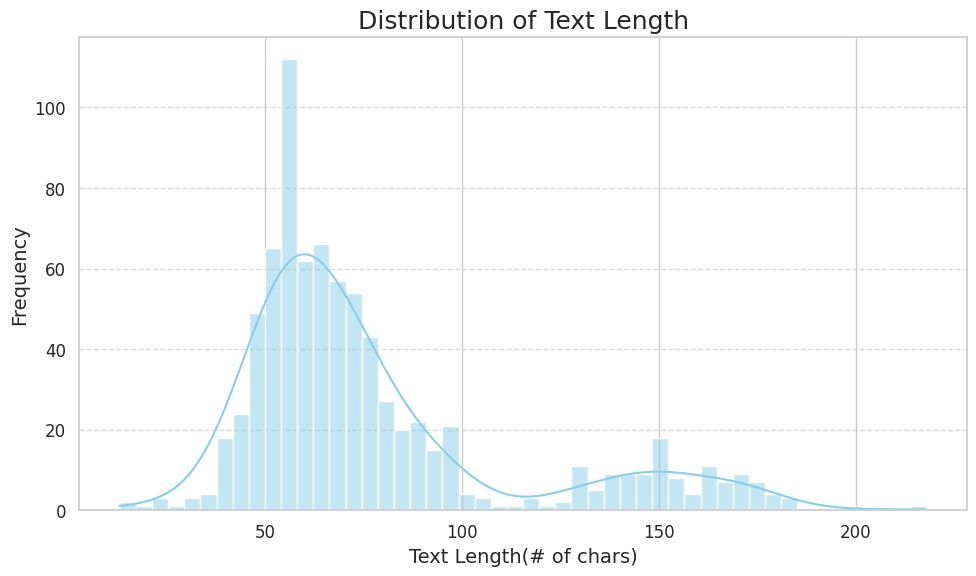

In [ ]:
# Calculate text lengths
df['text_length'] = df['review'].apply(len)

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length', fontsize=18)
plt.xlabel('Text Length(# of chars)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-axis tick font size
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

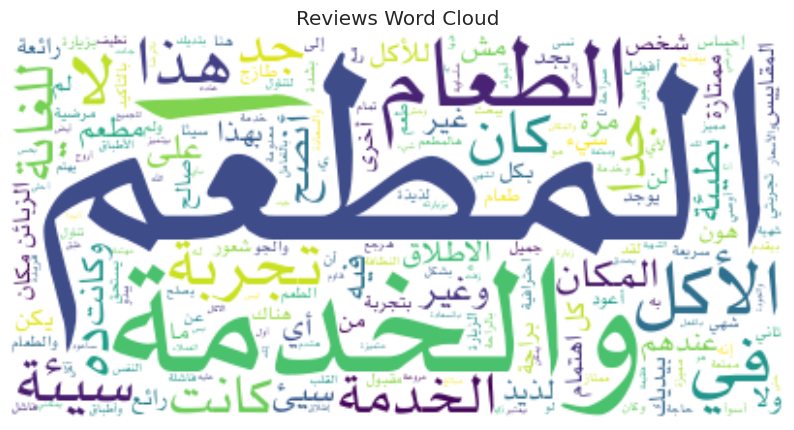

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['review'])

# Generate word cloud
wordcloud = WordCloud(font_path="AL-Mohanad.ttf", background_color='white', collocations=False).generate(all_reviews)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Reviews Word Cloud')
plt.axis('off')

plt.show()


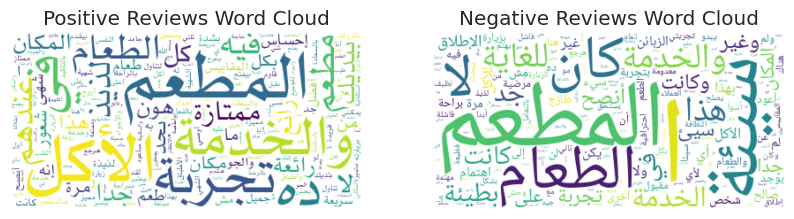

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string based on label
positive_reviews = ' '.join(df[df['label'] == 1]['review'])
negative_reviews = ' '.join(df[df['label'] == 0]['review'])

# Generate word clouds for positive and negative reviews
wordcloud_positive = WordCloud(font_path="AL-Mohanad.ttf", background_color='white', collocations=False).generate(positive_reviews)
wordcloud_negative = WordCloud(font_path="NotoNaskhArabic-VariableFont_wght.ttf", background_color='white', collocations=False).generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


# Text Preprocessing

In [ ]:
! pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.5 MB/s eta 0:00:00


In [ ]:
! pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
"""
    Preprocesses Arabic text by removing diacritics, normalizing hamza, removing punctuation and numbers,
    tokenizing the text, removing stopwords, applying stemming.
    """
from nltk.stem.isri import ISRIStemmer
import re
import nltk
import pyarabic.araby as araby


# Load the list of common Arabic stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('arabic'))
import nltk
nltk.download('isri')
from nltk.stem.isri import ISRIStemmer
# Initialize the stemmer
stemmer = ISRIStemmer()

def preprocess_arabic_text_with_stemming(text):

    text = araby.strip_tashkeel(text)  # Remove diacritics
    text = araby.normalize_hamza(text)  # Normalize hamza
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)  # Remove digits
    # Remove any non-Arabic characters
    text = re.sub(r'[^\u0600-\u06FF\s?]', '', text)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)

    # Trim leading and trailing white spaces'
    words = nltk.word_tokenize(text)
    text = text.strip()
    words = text.split()  # Split text into words
    # Apply stemming to each word
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if word not in ['ده']]
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]


    return ' '.join(stemmed_words)  # Return String of stemmed words



input_text = " مرحبا! ده  🌟 تعلمت علما معلم يعلمون نافعا ينفع هل تريدون أن نلتقي في 10:00am يوم السبت؟ 😊 لا يمكنني الحضور! ، لأنني مشغول السبت. ربما في وقت آخر. أرسلت لكم رسالة على john.doe@example.com."
#input_text = input("Please enter the Arabic text you want to process: ")
processed_text = preprocess_arabic_text_with_stemming(input_text)
print("The text after processing and stemming:", processed_text)

The text after processing and stemming: رحب علم علم علم علم نفع نفع ترد ءن لتق يوم سبت يمك حضر لءن شغل سبت ربم وقت ءءخر ءرسل رسل


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading isri: Package 'isri' not found in index


In [ ]:
# Preprocess text data
df['text'] = df['review'].apply(preprocess_arabic_text_with_stemming)

In [ ]:
df['text']

0                                                                                 طعم يجن اكل تحف
1                                                        ءنصح زير طعم بجد ءكل عند لذذ خدم تمز جدا
2                                                            لقد كانت جرب سيء طعم قبل خدم سيء غية
3                                                                   طقم حرف ءطلاق خدم بطء وغر فعل
4                                           طعم طعم سيء غية خدم كانت سيء ءيض يكن ءي همم جرب عملاء
                                                  ...                                            
795                                                                 خدم متز ءطباق شهة يمك نظر عود
796    كانت جرب طعم فشل طعم سيء غية ولم يكن طزج ءطلاق وكانت خدم بطء وغر احترافية ءعد مرة ءخرى ءكد
797                                     لقد متع بكل لحظ طعم طعم لذذ خدم تفن ءجواء رءع يمك نظر عود
798                                                          ءعد ءلى طعم مرة ءخرى طعم رضي خدم سيء
799                 

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Models

## SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
# Create a pipeline with TF-IDF vectorizer and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('svm', SVC(kernel='linear'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.99375
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      0.99      0.99        78

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



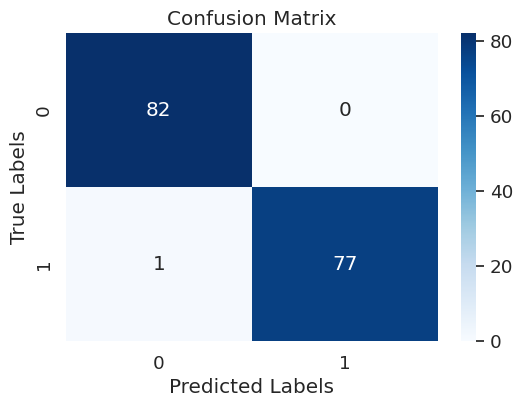

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Set Seaborn style
sns.set_style("whitegrid")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
conf_matrix

array([[82,  0],
       [ 1, 77]])

In [ ]:
input_text = input("Please enter the Arabic text you want to process: ")
# Predictions
pred = pipeline.predict([input_text])
if pred:
    print('Positive Review')
else:
    print('Negative Review')


Please enter the Arabic text you want to process: 
Positive Review


## Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('nb', MultinomialNB())  # Using Multinomial Naive Bayes classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        78

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



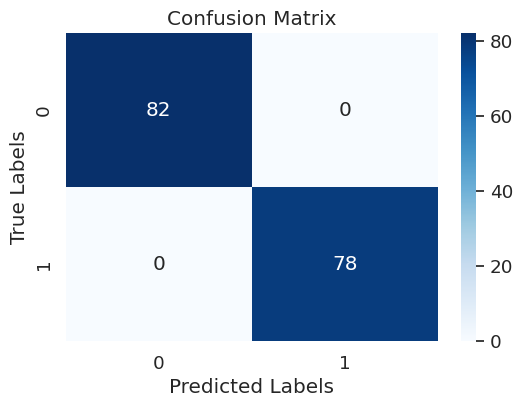

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Set Seaborn style
sns.set_style("whitegrid")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
conf_matrix

array([[82,  0],
       [ 0, 78]])

In [ ]:
input_text = input("Please enter the Arabic text you want to process: ")
# Predictions
pred = pipeline.predict([input_text])
if pred:
    print('Positive Review')
else:
    print('Negative Review')


Please enter the Arabic text you want to process: 
Positive Review


## RNN

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])

# Padding sequences
max_len = 100  # Adjust as needed based on your data
X = pad_sequences(X, maxlen=max_len)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Build the RNN model
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
8/8 [==============================] - 7s 467ms/step - loss: 0.6840 - accuracy: 0.7246 - val_loss: 0.6640 - val_accuracy: 0.9531
Epoch 2/10
8/8 [==============================] - 3s 407ms/step - loss: 0.6150 - accuracy: 0.9004 - val_loss: 0.5098 - val_accuracy: 0.9453
Epoch 3/10
8/8 [==============================] - 4s 495ms/step - loss: 0.4150 - accuracy: 0.9629 - val_loss: 0.2823 - val_accuracy: 0.9766
Epoch 4/10
8/8 [==============================] - 4s 531ms/step - loss: 0.2106 - accuracy: 0.9707 - val_loss: 0.1700 - val_accuracy: 0.9766
Epoch 5/10
8/8 [==============================] - 4s 500ms/step - loss: 0.0989 - accuracy: 0.9980 - val_loss: 0.0814 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 2s 219ms/step - loss: 0.0485 - accuracy: 0.9941 - val_loss: 0.0565 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 2s 217ms/step - loss: 0.0288 - accuracy: 0.9980 - val_loss: 0.0485 - val_accuracy: 0.9922
Epoch 8/10
8/8 [====

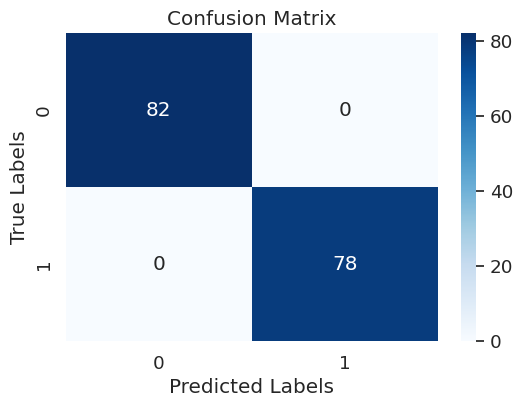

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Set Seaborn style
sns.set_style("whitegrid")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
conf_matrix

array([[82,  0],
       [ 0, 78]])

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.metrics import accuracy_score, classification_report

# Convert NumPy arrays to lists of strings
X_train_texts = [str(text) for text in X_train]
X_test_texts = [str(text) for text in X_test]

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_texts)
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)


# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define LSTM model
embedding_dim = 100  # You can adjust this based on your preference
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model
y_pred_proba = model.predict(X_test_pad)
y_pred = np.round(y_pred_proba).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Epoch 1/10
9/9 [==============================] - 6s 350ms/step - loss: 0.6790 - accuracy: 0.5833 - val_loss: 0.6320 - val_accuracy: 0.7344
Epoch 2/10
9/9 [==============================] - 5s 540ms/step - loss: 0.5853 - accuracy: 0.8090 - val_loss: 0.4666 - val_accuracy: 0.9531
Epoch 3/10
9/9 [==============================] - 3s 302ms/step - loss: 0.4120 - accuracy: 0.9653 - val_loss: 0.3457 - val_accuracy: 0.9688
Epoch 4/10
9/9 [==============================] - 3s 300ms/step - loss: 0.2343 - accuracy: 0.9844 - val_loss: 0.1718 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 3s 302ms/step - loss: 0.1109 - accuracy: 0.9861 - val_loss: 0.0950 - val_accuracy: 0.9688
Epoch 6/10
9/9 [==============================] - 4s 416ms/step - loss: 0.0511 - accuracy: 0.9948 - val_loss: 0.0594 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 4s 418ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 8/10
9/9 [====

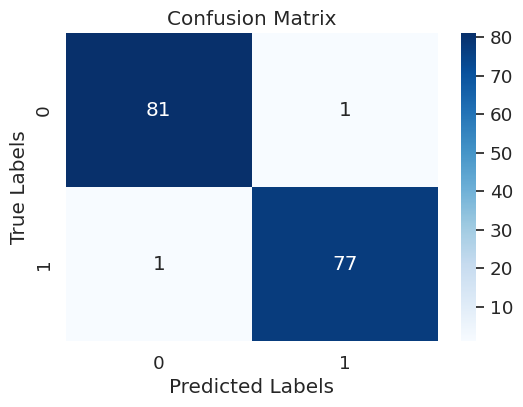

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Set Seaborn style
sns.set_style("whitegrid")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
conf_matrix

array([[81,  1],
       [ 1, 77]])

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from sklearn.metrics import accuracy_score, classification_report

# Convert NumPy arrays to lists of strings
X_train_texts = [str(text) for text in X_train]
X_test_texts = [str(text) for text in X_test]

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_texts)
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define GRU model
embedding_dim = 100  # You can adjust this based on your preference
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
y_pred_proba = model.predict(X_test_pad)
y_pred = np.round(y_pred_proba).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.5988 - loss: 0.6825 - val_accuracy: 0.8906 - val_loss: 0.6366
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.9291 - loss: 0.5550 - val_accuracy: 0.9688 - val_loss: 0.3810
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.8682 - loss: 0.3612 - val_accuracy: 0.9531 - val_loss: 0.2546
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9946 - loss: 0.1309 - val_accuracy: 0.9844 - val_loss: 0.1235
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9844 - loss: 66.8488 - val_accuracy: 0.9844 - val_loss: 0.0838
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Accuracy: 0.98125
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.99      0.97      0.98        78

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.9

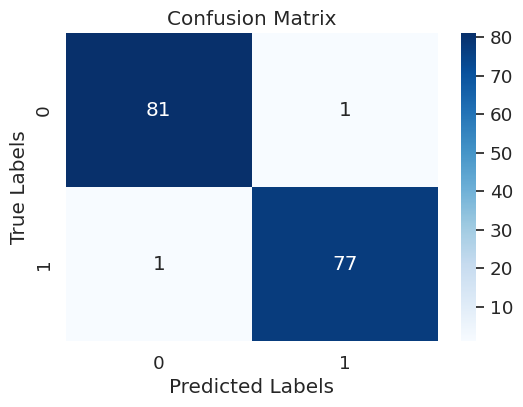

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Set Seaborn style
sns.set_style("whitegrid")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
conf_matrix

array([[81,  1],
       [ 1, 77]])